In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [2]:
#given parameters
L=60
r1=0.1
r2=0.15
n=100
m1=3
Cp1=4180
rho1=1000
m2=5
Cp2=4180
rho2=1000
T0=300
T1i=400
T2i=800
U=340
pi=3.14159
Ac1=pi*r1**2
Ac2=pi*(r2**2-r1**2)
t_final=1000
dt=1
dx=L/n

In [3]:
x=np.linspace(dx,L-dx/2,n)
T1=np.zeros(n)
dTdt1=np.zeros(n)
T2=np.zeros(n)
dTdt2=np.zeros(n)

T1.fill(T0)
T2.fill(T0)
T_1=np.zeros((t_final,n))
T_2=np.zeros((t_final,n))
t=np.arange(0,t_final,dt)

In [4]:
for i in range(1,len(t)):        
    dTdt1[1:n]=(U*2*pi*r1*dx*(T2[1:n]-T1[1:n])+ m1*Cp1*(T1[0:n-1]-T1[1:n]))/(rho1*Cp1*Ac1*dx)
    dTdt1[0]=(U*2*pi*r1*dx*(T2i-T1i) + m1*Cp1*(T1i-T1[0]))/(rho1*Cp1*Ac1*dx)
    
    dTdt2[1:n]=(U*2*pi*r2*dx*(T1[1:n]-T2[1:n])+ m2*Cp2*(T2[0:n-1]-T2[1:n]))/(rho2*Cp2*Ac2*dx)
    dTdt2[0]=(U*2*pi*r2*dx*(T1i-T2i) + m2*Cp2*(T2i-T2[0]))/(rho2*Cp2*Ac2*dx)
    
    T1=T1 + dTdt1*dt
    T_1[i,:]=T1
    T2=T2 + dTdt2*dt
    T_2[i,:]=T2

In [5]:
def map(T_1,T_2):
    plt.clf()
    plt.plot(x,T_1,label="Inner Pipe")
    plt.plot(x,T_2,label="Outer Pipe")
    plt.xlabel('Distance') 
    plt.ylabel('Temperature')
    plt.legend()
    plt.axis([0,L,200,1000])
    return plt

MovieWriter ffmpeg unavailable; using Pillow instead.


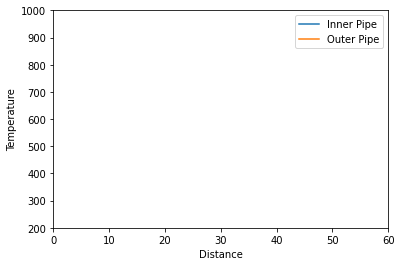

In [6]:
def animate(i):
    map(T_1[i,:],T_2[i,:])

anim = animation.FuncAnimation(plt.figure(), animate, interval=dt, frames=t_final, repeat=False)
anim.save("Heat_Exchangers1.gif")
plt.draw()
plt.show()